In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In C:\Users\tejas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\tejas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\tejas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\tejas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\tejas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df = pd.read_csv('D:\\TEJAS FORMAT\\DS_\\KAGGLE_PROJETCS\\DIABETES_PRED\\diabetes.csv')

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Checking for imbalanced dataset

In [4]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## EDA 


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

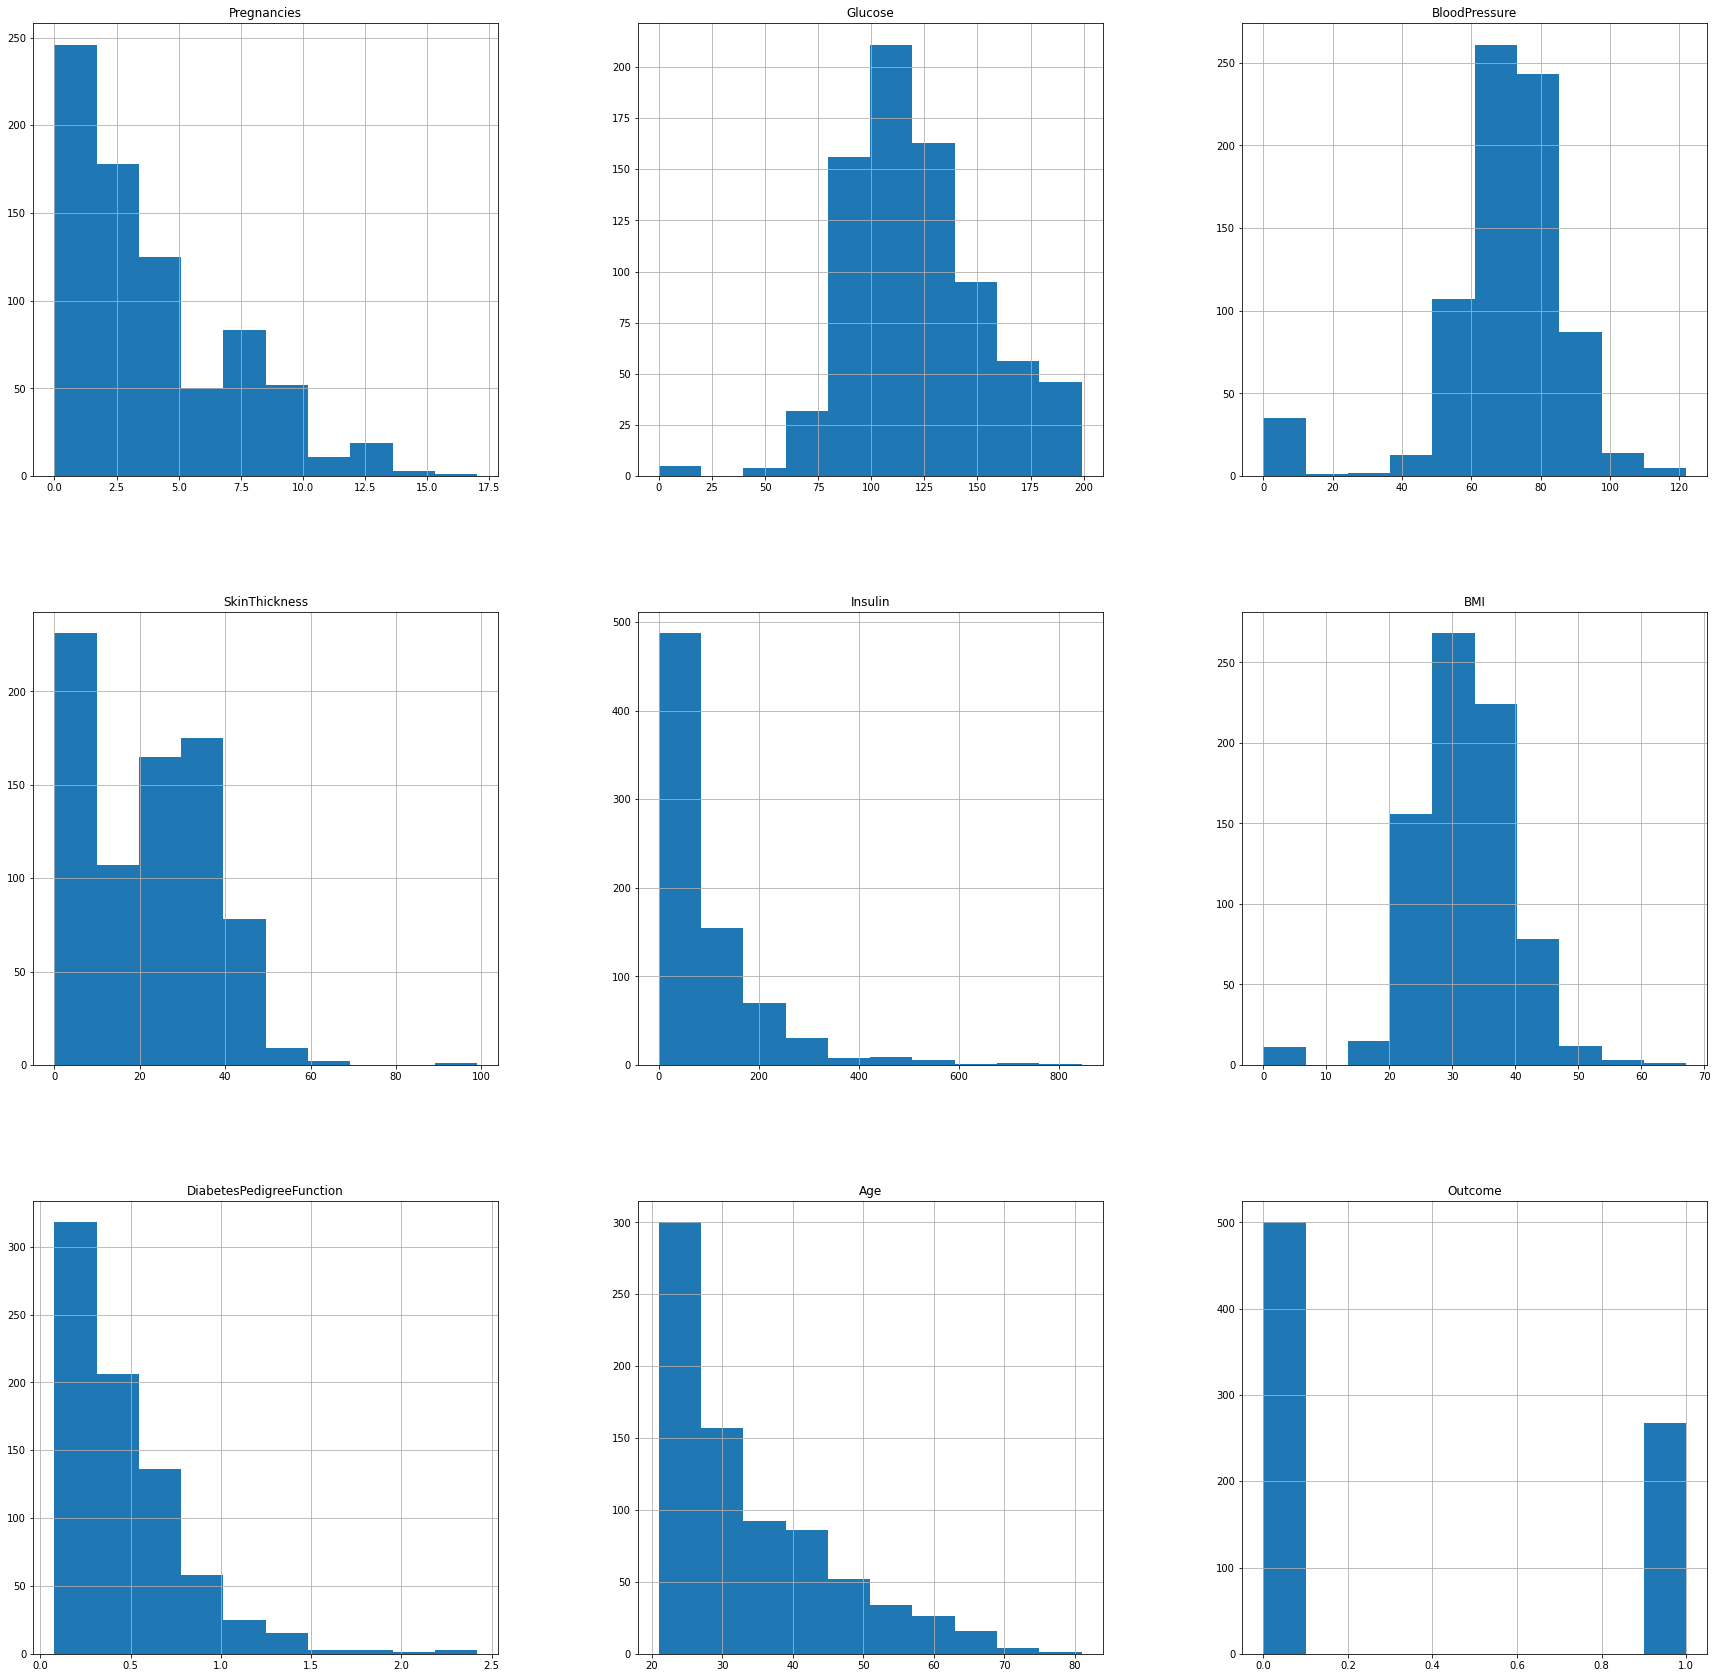

In [5]:
df.hist(figsize=(30,30))

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='Pregnancies'>

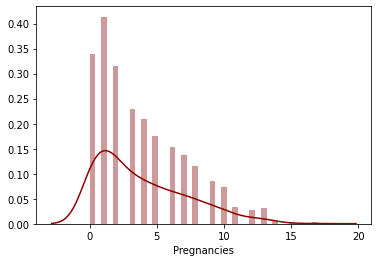

In [7]:
sns.distplot(df["Pregnancies"],color="darkred",bins=40)

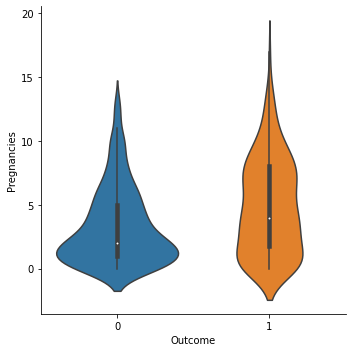

In [8]:
sns.catplot(x="Outcome",y="Pregnancies",kind="violin",data=df)

From above graph it shows that more impact of pregnancies for diabetes lies between 0-5.

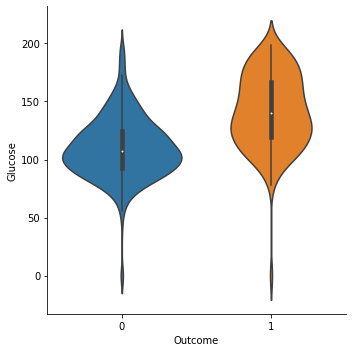

In [9]:
sns.catplot(x="Outcome",y="Glucose",kind="violin",data=df)

<AxesSubplot:xlabel='Glucose'>

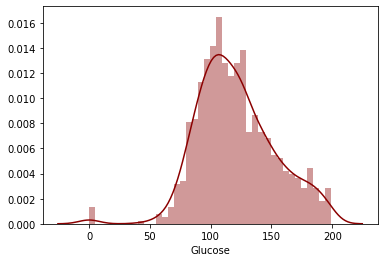

In [10]:
sns.distplot(df["Glucose"],color="darkred",bins=40)

Gluscose is main source for diabetes from above graph it shows glucose level

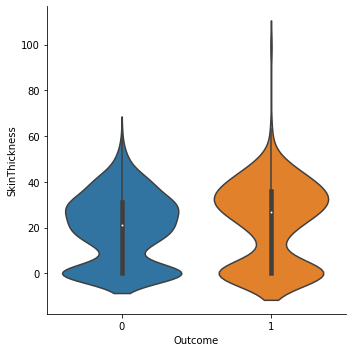

In [11]:
sns.catplot(x="Outcome",y="SkinThickness",kind="violin",data=df)

<AxesSubplot:xlabel='SkinThickness'>

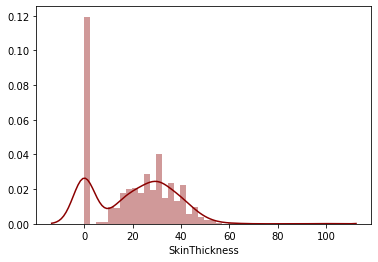

In [12]:
sns.distplot(df["SkinThickness"],color="darkred",bins=40)

<AxesSubplot:xlabel='Insulin'>

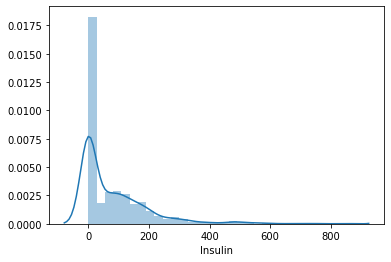

In [13]:
sns.distplot(df["Insulin"])

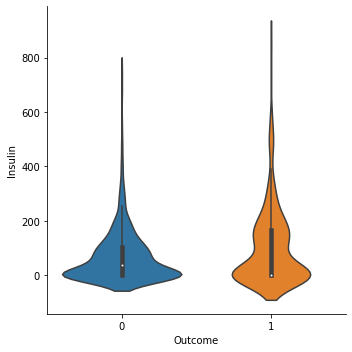

In [14]:
sns.catplot(x="Outcome",y="Insulin",kind="violin",data=df)

<AxesSubplot:xlabel='BMI'>

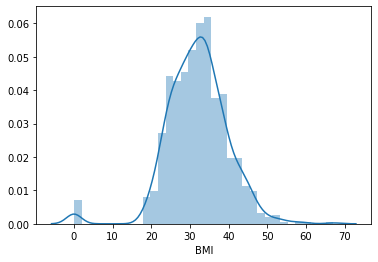

In [15]:
sns.distplot(df["BMI"])

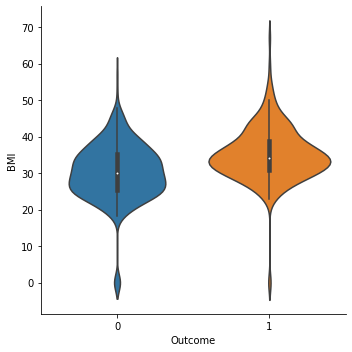

In [16]:
sns.catplot(x="Outcome",y="BMI",kind="violin",data=df)

BMI lies between 20-55 contains diabetes .

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

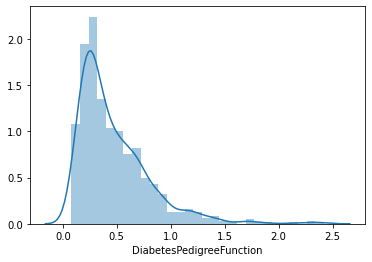

In [17]:
sns.distplot(df["DiabetesPedigreeFunction"])

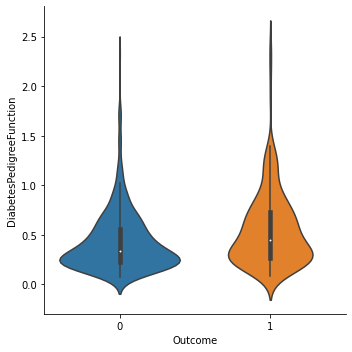

In [18]:
sns.catplot(x="Outcome",y="DiabetesPedigreeFunction",kind="violin",data=df)

<AxesSubplot:xlabel='Age'>

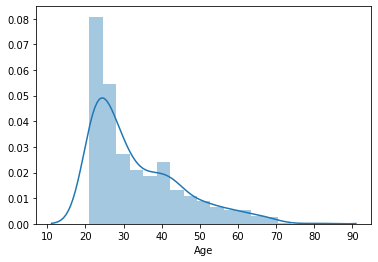

In [19]:
sns.distplot(df["Age"])

<AxesSubplot:xlabel='Age'>

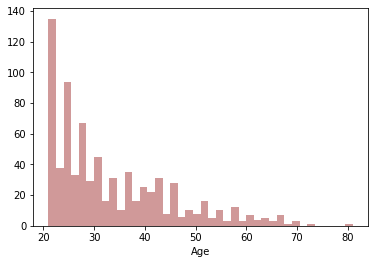

In [20]:
sns.distplot(df["Age"],kde=False,color="darkred",bins=40)


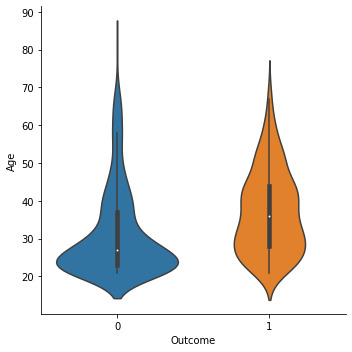

In [21]:
sns.catplot(x="Outcome",y="Age",kind="violin",data=df)

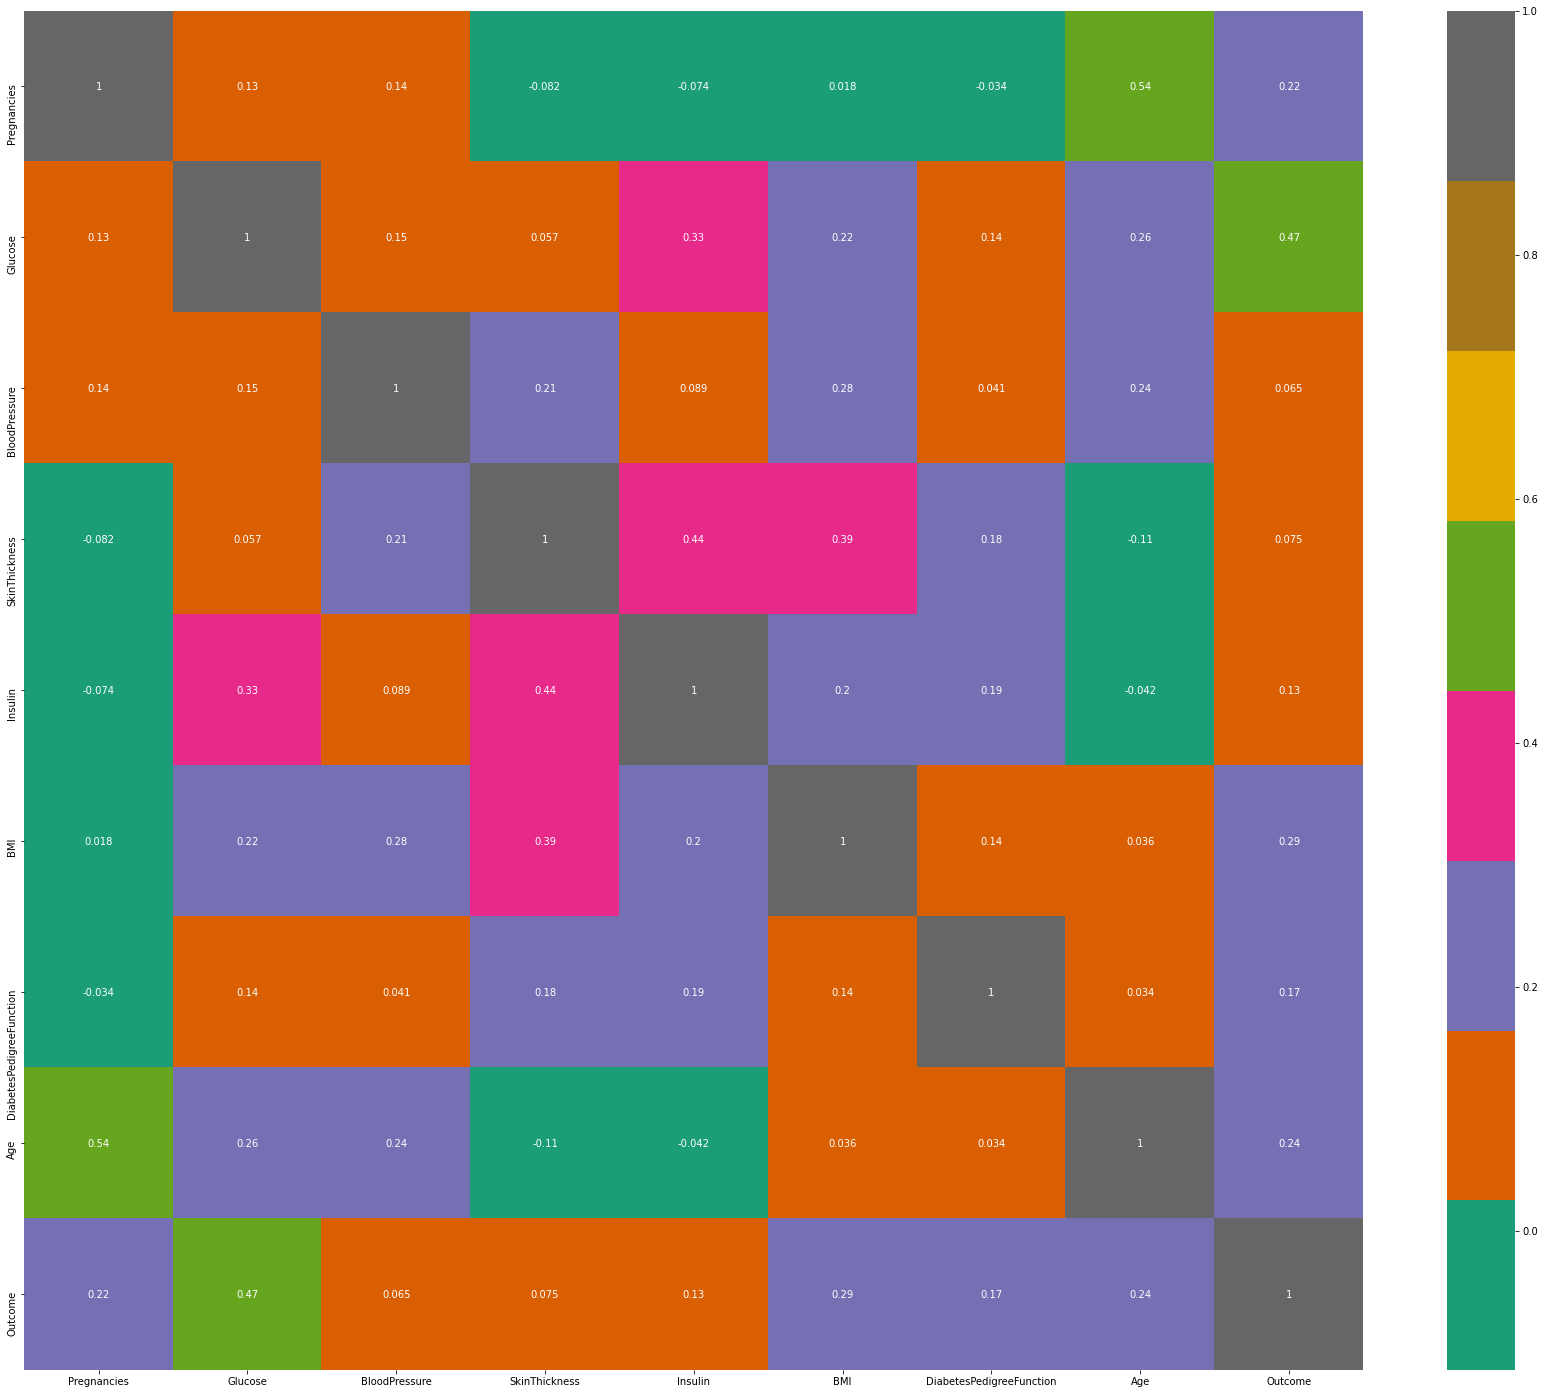

In [22]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),cmap="Dark2", annot=True,)
plt.show()

In [23]:
df1=df.copy()

##### Replacing "0" with "NaN" as "0" doesn't contribute so considering it as Null values.

In [24]:
df1[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]=df1[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.NaN)

In [25]:
df1.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#### Imputing null values with mean values.

In [26]:
df1["Glucose"].fillna(df1["Glucose"].mean(),inplace=True)
df1["BloodPressure"].fillna(df1["BloodPressure"].mean(),inplace=True)
df1["SkinThickness"].fillna(df1["SkinThickness"].mean(),inplace=True)
df1["Insulin"].fillna(df1["Insulin"].mean(),inplace=True)
df1["BMI"].fillna(df1["BMI"].mean(),inplace=True)

In [27]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Checking with outliers in data with the help of Boxplots.

Pregnancies


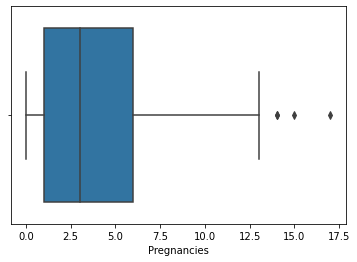

Glucose


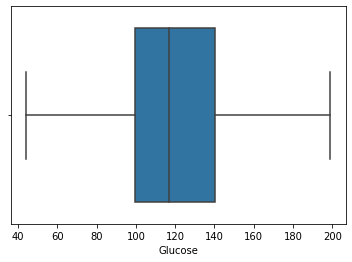

BloodPressure


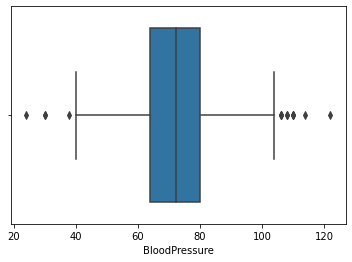

SkinThickness


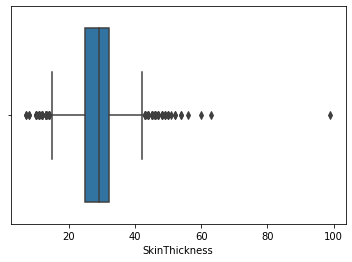

Insulin


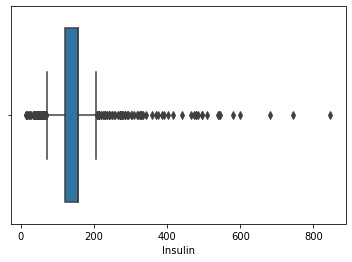

BMI


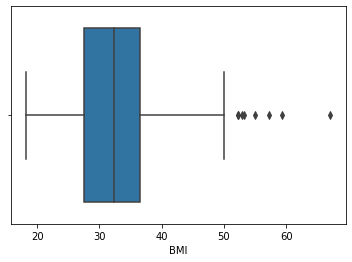

DiabetesPedigreeFunction


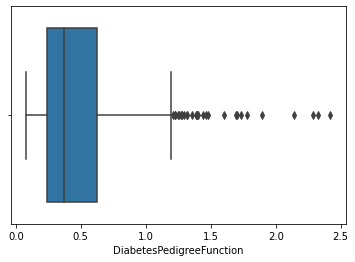

Age


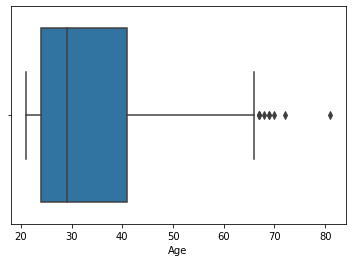

In [28]:
for col in df1.iloc[:,:-1].columns:
    print(col)
    sns.boxplot(x=df1[col],data=df1)
    plt.show()

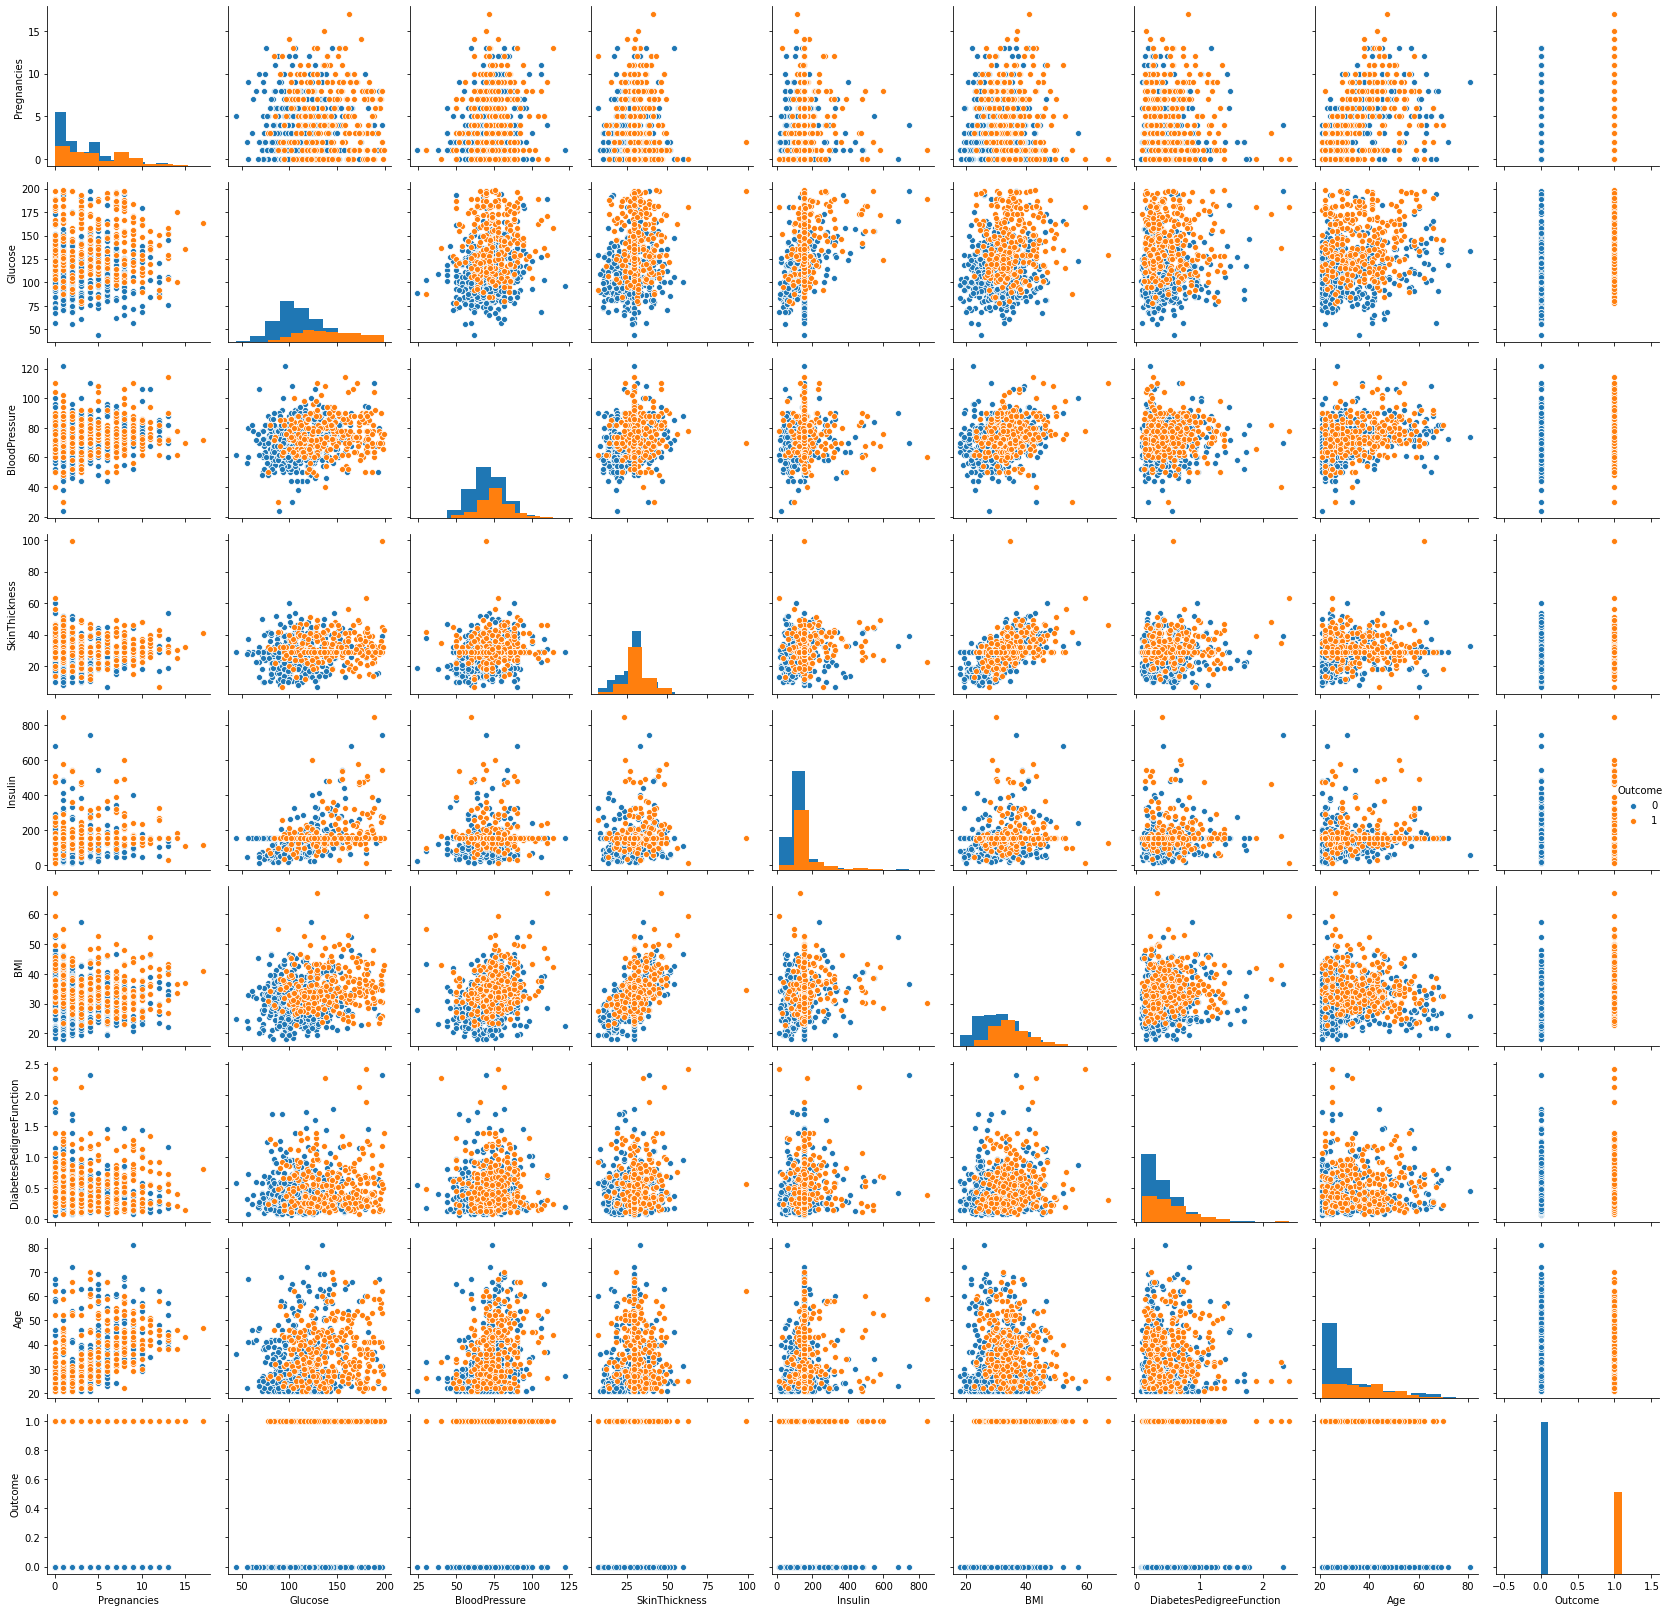

In [29]:
sns.pairplot(df1,hue='Outcome', diag_kind="hist");
plt.tight_layout()

#### Transforming outliers with IQR 

In [30]:
def boxoutlier(var):
    for x in var.iloc[:,:-1].columns :        
        Q1=var[x].quantile(0.25)
        Q3=var[x].quantile(0.75)
        IQR=Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x]=np.where(var[x].values > Upper,Upper,var[x].values)
        var.loc[:,x]=np.where(var[x].values < Lower,Lower,var[x].values)
        
    return var
df1=boxoutlier(df1)

Pregnancies


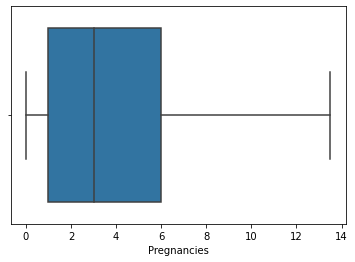

Glucose


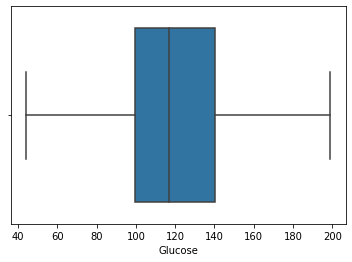

BloodPressure


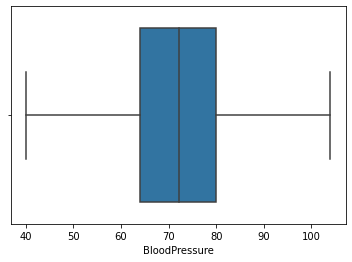

SkinThickness


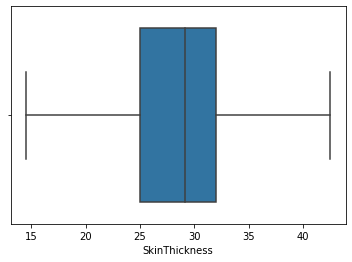

Insulin


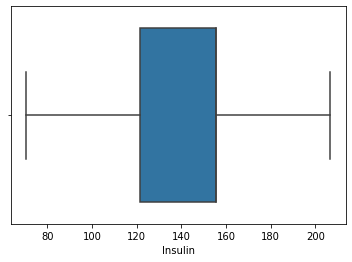

BMI


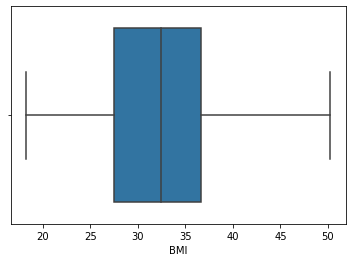

DiabetesPedigreeFunction


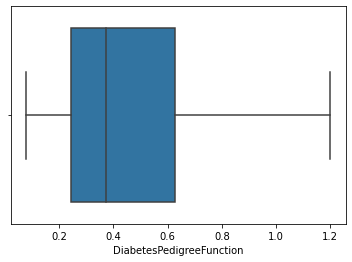

Age


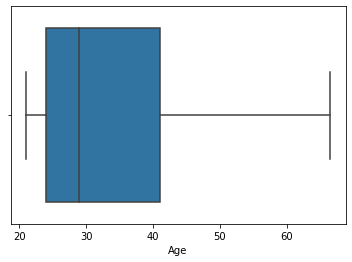

In [31]:
for col in df1.iloc[:,:-1].columns:
    print(col)
    sns.boxplot(x=df1[col],data=df1)
    plt.show()

In [32]:
X=df1.drop(["Outcome"],axis=1)
Y=df1["Outcome"]           

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [35]:
def models(X_train,Y_train):
    
    ###Logistics Regression
    from sklearn.linear_model import LogisticRegression
    le=LogisticRegression()
    log_re=le.fit(X_train,Y_train)
    
    
    ### Random Forest
    from sklearn.ensemble import RandomForestClassifier
    rclf=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 10)
    RF=rclf.fit(X_train,Y_train)
    
    ###KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=7)
    KNN=knn.fit(X_train,Y_train)
    
    ###SVM
    from sklearn.svm import SVC
    svl=SVC(kernel="linear",random_state=0)
    LINSVM=svl.fit(X_train,Y_train)
    
    svp=SVC(kernel="poly",random_state=0)
    POLSVM=svp.fit(X_train,Y_train)
    
    svrbf=SVC(kernel="rbf",random_state=0)
    RBFSVM=svrbf.fit(X_train,Y_train)
    
    print("[0]Logistic Regression Accuracy:",log_re.score(X_train,Y_train))

    print("[1]Random Forest:",RF.score(X_train,Y_train))
    
    print("[2]KNN:",KNN.score(X_train,Y_train))
    
    print("[3]Linear SVM:",LINSVM.score(X_train,Y_train))
    
    print("[4]Polynomial SVM:",POLSVM.score(X_train,Y_train))
    
    print("[5]RBF SVM:",RBFSVM.score(X_train,Y_train))
    
    return log_re,RF,KNN,LINSVM,POLSVM,RBFSVM

model=models(X_train,Y_train)

[0]Logistic Regression Accuracy: 0.7687296416938111
[1]Random Forest: 0.988599348534202
[2]KNN: 0.8127035830618893
[3]Linear SVM: 0.7736156351791531
[4]Polynomial SVM: 0.7964169381107492
[5]RBF SVM: 0.8224755700325733


C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [37]:
for i in range(len(model)):
    print("Model",i)
    print(classification_report(Y_test,model[i].predict(X_test)))
    print(accuracy_score(Y_test, model[i].predict(X_test)))
    print()

Model 0
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

0.7727272727272727

Model 1
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

0.7597402597402597

Model 2
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted a

In [38]:
pred=model[5].predict(X_test)
print(pred)


[0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 0]
